<a href="https://colab.research.google.com/github/karl-karlsson/notebooks/blob/main/google_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![war](https://cdn.abcotvs.com/dip/images/11620581_030422-kgo-ov-war-in-ukraine-img.jpg?w=800&r=16%3A9)<br>
<font size=1>Image from: abc7news.com</font>

# Using Google trends to 

On february 24th 2022 Vladimir Putin decided to invade Ukraine (again...).

No one can be certain what the exact goal of this "military special operation" (ie. war) really was. But most experts seem to agree on that the results so far have been somewhere between "less than expected" and "catastrophic" for Russia.

In this project I will use Google search data to visualize some interesting trends and patterns from Google search in connection to this war. 

The coding is done in `R` and the following packages are used:

* `tidyverse` (including `ggplot2`)
* `gtrendsR` (to fetch data from Google trends)

# Setup 
Lets first install and load the necessary packages

In [171]:
options(warn=-1) # This turns off 'warnings', not a good idea when working with the notebook but it makes for a better reading experience when finished

# Install packages
install.packages(c("tidyverse","gtrendsR","maps","ggthemes"))

# Load packages
library(tidyverse)
library(gtrendsR)
library(maps)
library(ggthemes)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# How did Russias second invasion affect searchers for "NATO"?

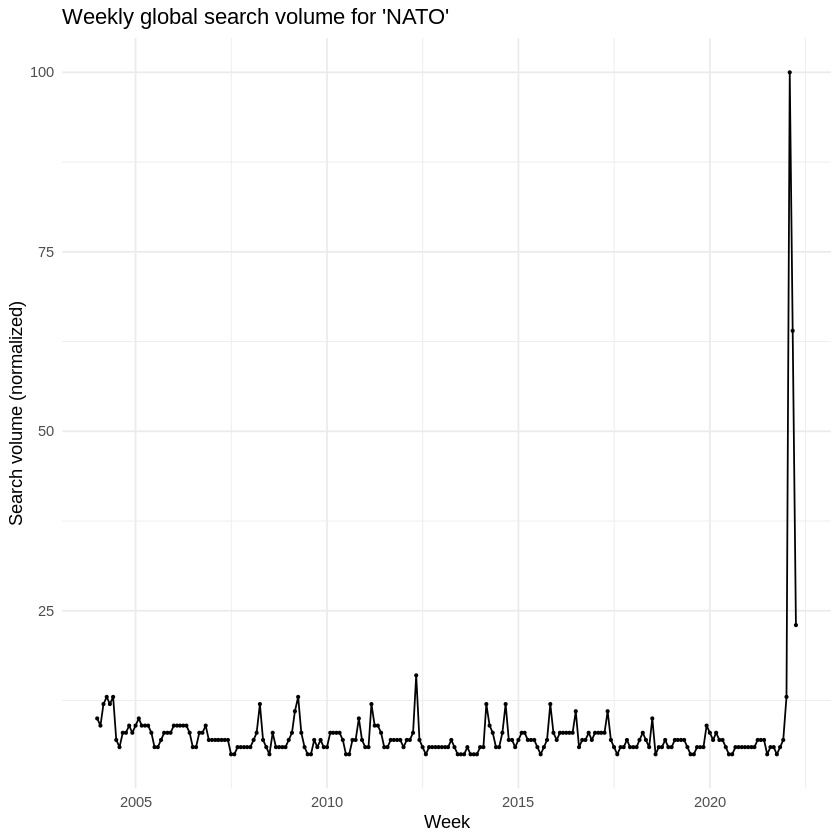

In [26]:
nato = gtrends(c("NATO"), time="all") # Pull search data for 'NATO'

nato$interest_over_time %>%
ggplot(aes(x=date,y=hits))+
geom_line(size=0.5)+
geom_point(size=0.5)+
theme_minimal()+
xlab("Week")+
ylab("Search volume (normalized)")+
labs(title="Weekly global search volume for 'NATO'")



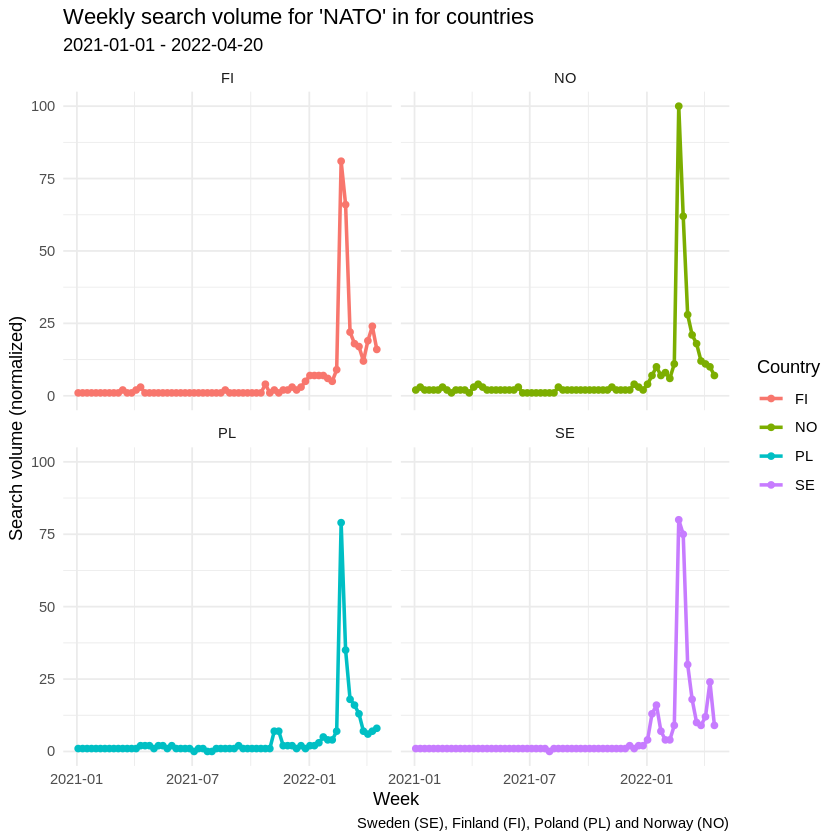

In [37]:
nato_countries = gtrends(c("NATO"),geo=c("SE","FI","PL","NO"),time="2021-01-01 2022-04-20")

nato_countries = nato_countries$interest_over_time

nato_countries = nato_countries %>%
mutate(NATO=case_when(geo=="SE" | geo =="FI" ~ "Not in NATO",
TRUE ~ "In NATO"),
Country=geo) %>%
mutate(hits=as.numeric(ifelse(hits=="<1",0,hits)))

nato_countries %>%
ggplot(aes(x=date,y=hits, color=Country))+
geom_line(size=1)+
geom_point()+
theme_minimal()+
xlab("Week")+
ylab("Search volume (normalized)")+
facet_wrap(~Country)+
labs(title="Weekly search volume for 'NATO' in for countries",
subtitle="2021-01-01 - 2022-04-20",
caption="Sweden (SE), Finland (FI), Poland (PL) and Norway (NO)")


In [166]:
nato_europe_before = gtrends(c("NATO"),time="2022-01-01 2022-02-23", low_search_volume=T)
nato_europe_after = gtrends(c("NATO"),time="2022-02-24 2022-04-21", low_search_volume=T)


nato_europe_before = nato_europe_before$interest_by_country %>% mutate(id=1)
nato_europe_after = nato_europe_after$interest_by_country %>% mutate(id=2)

nato_europe = rbind(nato_europe_before,nato_europe_after) %>%
group_by(location) %>%
mutate(`Increase in relative search`=lag(hits,order_by=id)) %>%
mutate(`Increase in relative search`=as.numeric(hits) - as.numeric(`Increase in relative search`)) %>%
ungroup() %>%
filter(id==2)


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [168]:
world = map_data("world")

european_countries = c(
"Germany",
"United Kingdom",
"France",
"Italy",
"Spain",
"Ukraine",
"Poland",
"Romania",
"Netherlands",
"Belgium",
"Czechia",
"Greece",
"Portugal",
"Sweden",
"Hungary",
"Austria",
"Serbia",
"Switzerland",
"Bulgaria",
"Denmark",
"Finland",
"Slovakia",
"Norway",
"Ireland",
"Croatia",
"Moldova",
"Bosnia and Herzegovina",
"Albania",
"Lithuania",
"North Macedonia",
"Slovenia",
"Latvia",
"Estonia",
"Montenegro",
"Luxembourg",
"Malta",
"Iceland")


world = world %>% mutate(region = replace(region, region=="USA", "United States")) %>%
  mutate(region = replace(region, region=="UK", "United Kingdom")) %>%
  mutate(region= replace(region, region=="Czech Republic", "Czechia"	)) %>%
  mutate(region = replace(region, region=="Democratic Republic of the Congo", "Congo - Kinshasa")) %>%
  mutate(region = replace(region, region=="Republic of Congo", "Congo - Brazzaville")) %>%
  mutate(region = replace(region, region=="Czech Republic","Czechia")) %>%
  filter(region %in% european_countries)

plot_df = nato_europe %>%
filter(location %in% european_countries) %>%
 mutate(region = location) %>%
select(region, `Increase in relative search`)

Warning message:
“Ignoring unknown aesthetics: x, y”


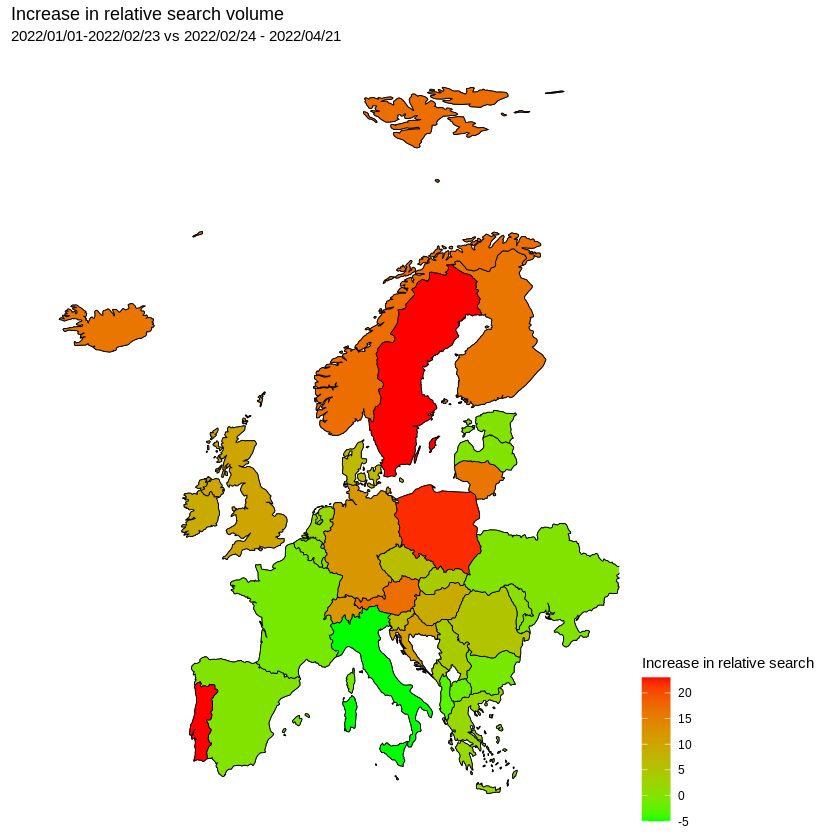

In [169]:
ggplot(world) +
  geom_map(map = world,
           aes(x = long, y = lat, map_id = region),
            color="black",fill="white", size=0.25)+
           geom_map(data = plot_df ,
           map = world,
           aes(fill = `Increase in relative search`, map_id = region), color="black",size=0.25)+
           scale_fill_continuous(low = 'green', high = 'red') +

        ggtitle("Search interest for NATO")+
        labs(title="Increase in relative search volume",
        subtitle="2022/01/01-2022/02/23 vs 2022/02/24 - 2022/04/21")+
        scale_x_continuous(limits = c(-30, 40), expand = c(0, 0))+
        theme_map()+
        theme(axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title = element_blank())+
                theme(legend.position="right")


location,hits,keyword,geo,gprop
<chr>,<int>,<chr>,<chr>,<chr>
Kabardino-Balkaria,100,дезертирство,RU,web
Dagestan Republic,98,дезертирство,RU,web
Stavropol Krai,77,дезертирство,RU,web
Chechnya,72,дезертирство,RU,web
Ingushetia,71,дезертирство,RU,web
Rostov Oblast,56,дезертирство,RU,web
Novosibirsk Oblast,32,дезертирство,RU,web
Nizhny Novgorod Oblast,30,дезертирство,RU,web
Sverdlovsk Oblast,30,дезертирство,RU,web


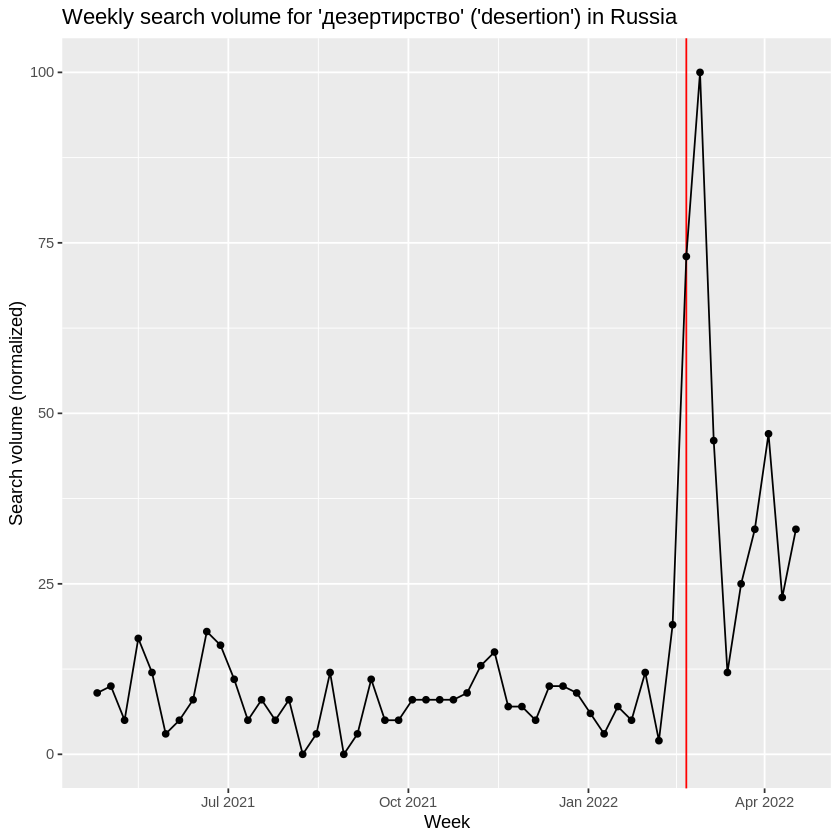

In [303]:
# Weekly search volume for desertion i Russia
desertion = gtrends(c("дезертирство"),geo=c("RU"),time="2021-04-21 2022-04-20", low_search_volume = T)

desertion$interest_over_time %>%
ggplot(aes(x=date, y=hits))+
geom_vline(xintercept = as.POSIXct(as.Date("2022-02-20")), color="red")+
geom_line()+
geom_point()+
xlab("Week")+
ylab("Search volume (normalized)")+
ggtitle("Weekly search volume for 'дезертирство' ('desertion') in Russia")

desertion$interest_by_region

ERROR: ignored

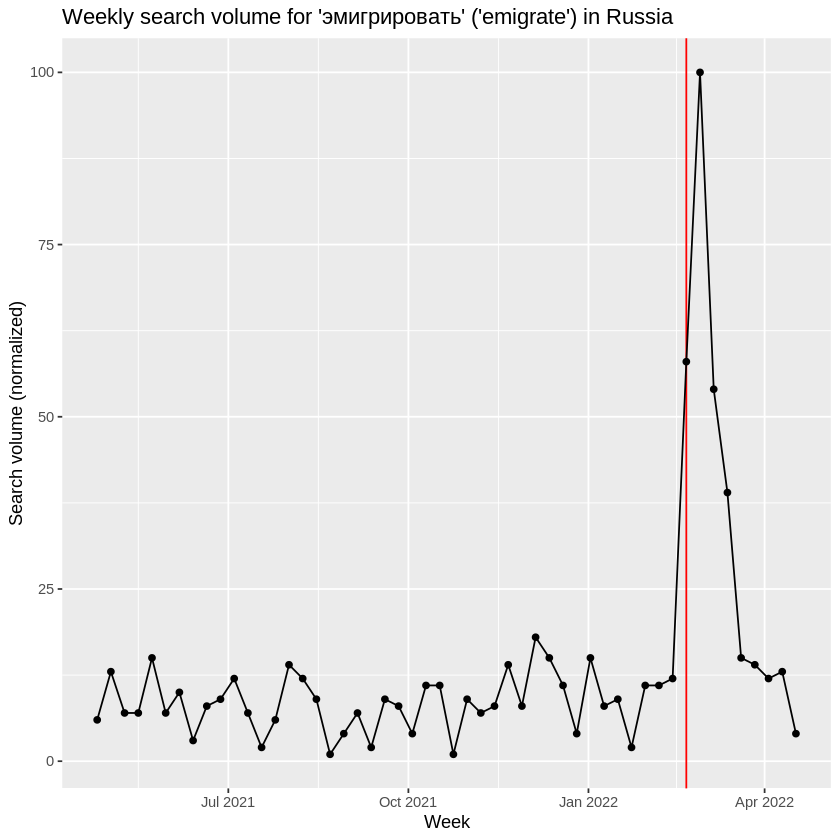

In [301]:
# Weekly search volume for emigrate in Russia
emigrate = gtrends(c("эмигрировать"),geo=c("RU"),time="2021-04-21 2022-04-20", low_search_volume = T)

emigrate$interest_over_time %>%
ggplot(aes(x=date, y=hits))+
geom_vline(xintercept = as.POSIXct(as.Date("2022-02-20")), color="red")+
geom_line()+
geom_point()+
xlab("Week")+
ylab("Search volume (normalized)")+
ggtitle("Weekly search volume for 'эмигрировать' ('emigrate') in Russia")

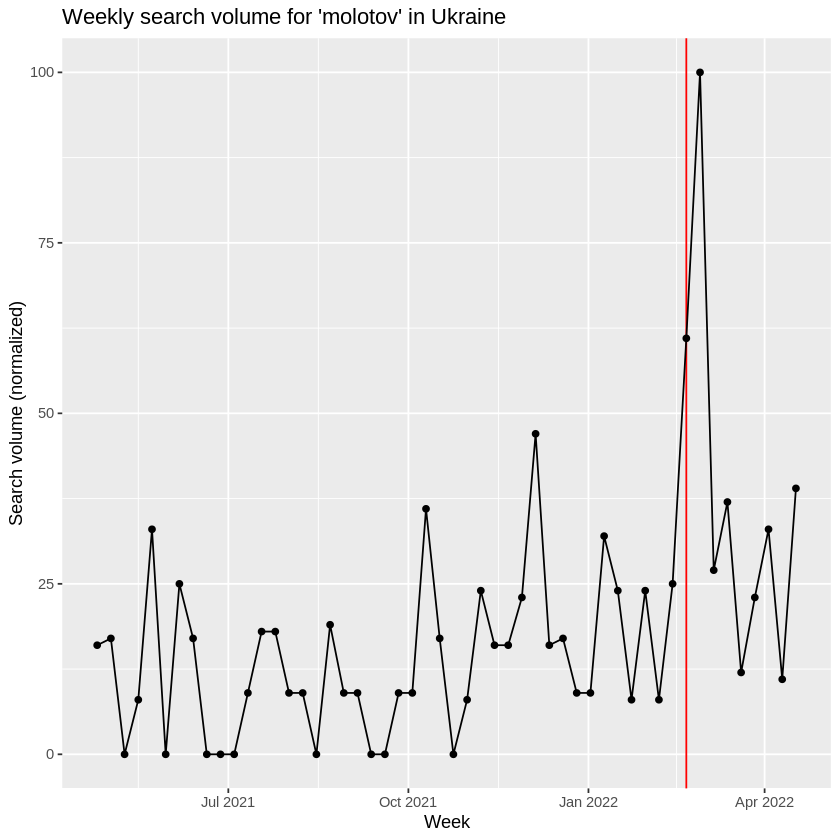

In [124]:
# Weekly search volume for molotov in Ukraine
molotov = gtrends(c("molotov"),geo=c("UA"),time="2021-04-21 2022-04-20")

molotov$interest_over_time %>%
ggplot(aes(x=date, y=hits))+
geom_vline(xintercept = as.POSIXct(as.Date("2022-02-20")), color="red")+
geom_line()+
geom_point()+
xlab("Week")+
ylab("Search volume (normalized)")+
ggtitle("Weekly search volume for 'molotov' in Ukraine")

# Nytt avsnitt

In [78]:
countries %>% filter(name=="UKRAINE")

country_code,sub_code,name
<chr>,<chr>,<chr>
UA,NA,UKRAINE


In [ ]:
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("gtrendsR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’, ‘anytime’




In [ ]:
categories %>% filter(str_detect(name,"military"))

name,id
<chr>,<chr>


In [ ]:
test = gtrends(c("join NATO"),geo=c("SE","FI"), time="2012-01-01 2022-03-31")

# test = gtrends(c("эмигрировать"), geo="RU") #emigrate
#test = gtrends(c("похороны"), geo="RU") # funeral // NO

#test = gtrends(c("дезертирство"), geo="RU") # desertion 

test = gtrends(c("Slava Ukraini"))

test$interest_over_time %>% head(n=200)



,date,hits,keyword,geo,time,gprop,category
,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2017-04-23,<1,Slava Ukraini,world,today+5-y,web,0
2,2017-04-30,0,Slava Ukraini,world,today+5-y,web,0
3,2017-05-07,1,Slava Ukraini,world,today+5-y,web,0
4,2017-05-14,<1,Slava Ukraini,world,today+5-y,web,0
5,2017-05-21,<1,Slava Ukraini,world,today+5-y,web,0
6,2017-05-28,<1,Slava Ukraini,world,today+5-y,web,0
7,2017-06-04,<1,Slava Ukraini,world,today+5-y,web,0
8,2017-06-11,<1,Slava Ukraini,world,today+5-y,web,0
9,2017-06-18,<1,Slava Ukraini,world,today+5-y,web,0


In [ ]:
countries %>% filter(country_code=="SE")

country_code,sub_code,name
<chr>,<chr>,<chr>
SE,NA,SWEDEN
SE,SE-K,BLEKINGE LAN
SE,SE-W,DALARNAS LAN
SE,SE-I,GOTLANDS LAN
SE,SE-X,GAVLEBORGS LAN
SE,SE-N,HALLANDS LAN
SE,SE-Z,JAMTLANDS LAN
SE,SE-F,JONKOPINGS LAN
SE,SE-H,KALMAR LAN


,date,hits,keyword,geo,time,gprop,category
,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,2017-04-23,0,Slava Ukraini,world,today+5-y,web,0
2,2017-04-30,0,Slava Ukraini,world,today+5-y,web,0
3,2017-05-07,1,Slava Ukraini,world,today+5-y,web,0
4,2017-05-14,0,Slava Ukraini,world,today+5-y,web,0
5,2017-05-21,0,Slava Ukraini,world,today+5-y,web,0
6,2017-05-28,0,Slava Ukraini,world,today+5-y,web,0
7,2017-06-04,0,Slava Ukraini,world,today+5-y,web,0
8,2017-06-11,0,Slava Ukraini,world,today+5-y,web,0
9,2017-06-18,0,Slava Ukraini,world,today+5-y,web,0


date,hits,keyword,geo,time,gprop,category
<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
2017-04-23,0,Slava Ukraini,world,today+5-y,web,0
2017-04-30,0,Slava Ukraini,world,today+5-y,web,0
2017-05-07,1,Slava Ukraini,world,today+5-y,web,0
2017-05-14,0,Slava Ukraini,world,today+5-y,web,0
2017-05-21,0,Slava Ukraini,world,today+5-y,web,0
2017-05-28,0,Slava Ukraini,world,today+5-y,web,0
2017-06-04,0,Slava Ukraini,world,today+5-y,web,0
2017-06-11,0,Slava Ukraini,world,today+5-y,web,0
2017-06-18,0,Slava Ukraini,world,today+5-y,web,0


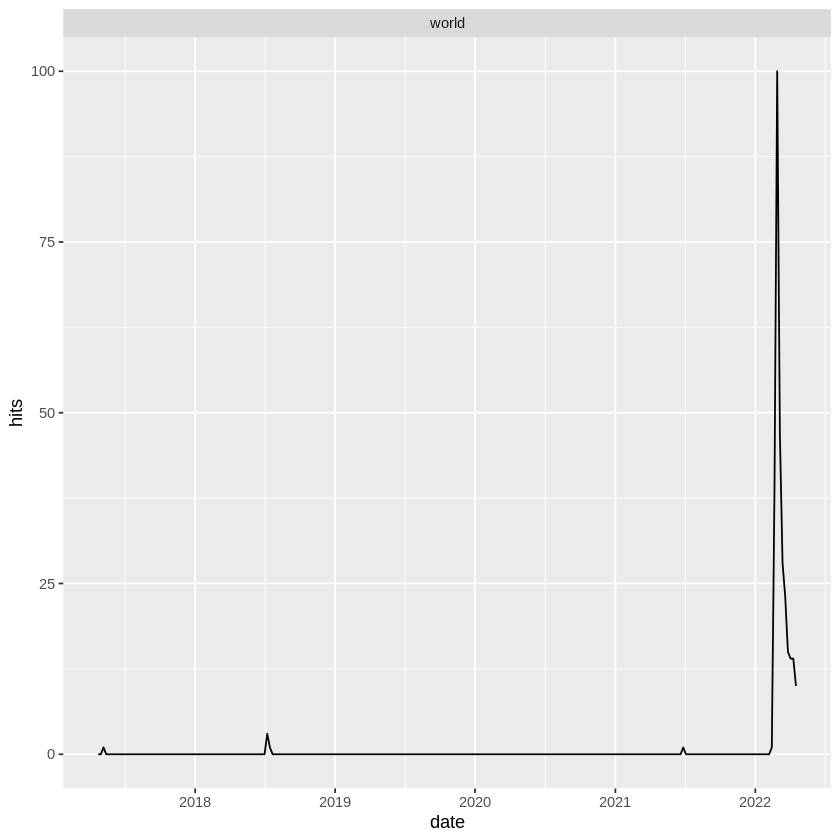

In [ ]:
library(dplyr)
library(ggplot2)

test$interest_over_time$hits = ifelse(test$interest_over_time$hits == "<1", "0", test$interest_over_time$hits)
test$interest_over_time$hits = as.numeric(test$interest_over_time$hits)

test$interest_over_time %>% 
ggplot(aes(x=date, y=hits))+
geom_line()+
facet_wrap(~geo)

test$interest_over_time %>% head(n=200)

test$interest_over_time

In [272]:
russia = gtrends(c("Украина"), geo=c("RU"), low_search_volume=T, time="2022-01-01 2022-04-01")

russia$related_queries


subject,related_queries,value,geo,keyword,category
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
100,top,новости украина,RU,Украина,0
49,top,россия украина,RU,Украина,0
49,top,россия,RU,Украина,0
31,top,новости россия украина,RU,Украина,0
31,top,новости россия,RU,Украина,0
12,top,украина карта,RU,Украина,0
10,top,украина последние новости,RU,Украина,0
10,top,украина война,RU,Украина,0
7,top,украина сегодня,RU,Украина,0
